In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DF 불러오기

In [2]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
436012,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000
436013,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
436014,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [4]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436016 entries, 0 to 436015
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   자치구          436016 non-null  object 
 1   계약일          436016 non-null  object 
 2   건물면적(㎡)      436016 non-null  float64
 3   층            436016 non-null  int64  
 4   Fed기준금리      436016 non-null  float64
 5   건물연식         436016 non-null  int64  
 6   GDP대비가계부채비율  436016 non-null  float64
 7   EPU          436016 non-null  float64
 8   장단기금리spread  436016 non-null  float64
 9   LTV          436016 non-null  float64
 10  물건금액(만원)     436016 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 36.6+ MB


# 건물면적 컬럼 제거


In [4]:
df.drop('건물면적(㎡)',axis=1,inplace=True)

In [5]:
df.head()

,자치구,계약일,층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),회사채3년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,10,1961.310059,0.34,26.9,9894,1.77,2.03,2.1,...,1.5,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,10,1961.310059,0.34,26.9,9894,1.77,2.03,2.1,...,1.5,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,3,1961.310059,0.34,26.9,9894,1.77,2.03,2.1,...,1.5,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,10,1961.310059,0.34,26.9,9894,1.77,2.03,2.1,...,1.5,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,4,1961.310059,0.34,26.9,9894,1.77,2.03,2.1,...,1.5,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000


# Train/Test Split


In [9]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

C:\Users\user\AppData\Local\Temp\ipykernel_9488\2269776461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['계약일'] = pd.to_datetime(df['계약일'])


## feature & target split

In [11]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [12]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# Scaling
1. Features - minMax
2. Target - Log 

In [13]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

365652    4.716003
365653    4.722634
365654    4.380211
365655    5.079181
365656    4.361728
            ...   
436011    5.054996
436012    5.139879
436013    5.235528
436014    4.568202
436015    4.883661
Name: 물건금액(만원), Length: 70364, dtype: float64

# OLS - Scaling 후

## OLS_1

In [15]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.632e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:56:30   Log-Likelihood:             1.2047e+05
No. Observations:              365652   AIC:                        -2.409e+05
Df Residuals:                  365632   BIC:                        -2.407e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4834      0.009    501.370      0.000       4.466       4.501
건물면적(㎡)               0.5392      0.001    440.814      0.000       0.537       0.542
층                     0.2888      0.004     81.646      0.000       0.282       0.296
KOSPI종가               0.0111      0.007      1.599      0.110      -0.003       0.025
Fed기준금리              -0.1482      0.004    -36.561      0.000      -0.156      -0.140
국제유가(Dubai)($/배럴)     0.1426      0.004     35.991      0.000       0.135       0.150
부동산거래량                0.0234      0.002     11.074      0.000       0.019       0.028
국고채5년(평균)            -0.3374      0.021    -15.811      0.000      -0.379      -0.296
국고채10년(평균)            0.2901      0.016     18.457      0.000       0.259       0.321
회사채3년(평균)             0.1355      0.006     21.622      0.000       0.123       0.148
CD91물(평균)            -0.0440      0.009     -4.826      0.000      -0.062      -0.026
BOK기준금리              -0.0893      0.008    -11.681      0.000      -0.104      -0.074
건물연식                 -0.0364      0.002    -19.148      0.000      -0.040      -0.033
GDP대비가계부채비율          -0.0154      0.007     -2.363      0.018      -0.028      -0.003
환율종가                  0.0210      0.003      6.167      0.000       0.014       0.028
선행지수순환변동치             0.1326      0.005     26.035      0.000       0.123       0.143
EPU                  -0.0106      0.002     -5.069      0.000      -0.015      -0.007
장단기금리spread          -0.2498      0.010    -25.907      0.000      -0.269      -0.231
금값종가                 -0.0107      0.006     -1.691      0.091      -0.023       0.002
LTV                  -0.2801      0.002   -119.259      0.000      -0.285      -0.276
==============================================================================
Omnibus:                    20088.164   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25537.819
Skew:                           0.545   Prob(JB):                         0.00
Kurtosis:                       3.700   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X_scaled.drop('금값종가', axis=1, inplace=True)

In [13]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4445.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:28:23   Log-Likelihood:                 42548.
No. Observations:              365652   AIC:                        -8.506e+04
Df Residuals:                  365634   BIC:                        -8.486e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0804      0.011    480.446      0.000       5.060       5.101
층                     0.3714      0.004     84.982      0.000       0.363       0.380
KOSPI종가              -0.0155      0.008     -1.871      0.061      -0.032       0.001
Fed기준금리              -0.1520      0.005    -31.680      0.000      -0.161      -0.143
국제유가(Dubai)($/배럴)     0.1869      0.005     38.583      0.000       0.177       0.196
부동산거래량                0.0387      0.003     14.831      0.000       0.034       0.044
국고채5년(평균)            -0.2757      0.026    -10.801      0.000      -0.326      -0.226
국고채10년(평균)            0.2778      0.019     14.908      0.000       0.241       0.314
회사채3년(평균)             0.1486      0.008     19.202      0.000       0.133       0.164
CD91물(평균)            -0.1203      0.011    -10.788      0.000      -0.142      -0.098
BOK기준금리              -0.1637      0.009    -17.317      0.000      -0.182      -0.145
건물연식                 -0.1212      0.002    -51.832      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.1634      0.006    -25.404      0.000      -0.176      -0.151
환율종가                  0.0261      0.004      6.214      0.000       0.018       0.034
선행지수순환변동치             0.1653      0.006     26.579      0.000       0.153       0.178
EPU                  -0.0224      0.003     -8.694      0.000      -0.028      -0.017
장단기금리spread          -0.3279      0.012    -27.644      0.000      -0.351      -0.305
LTV                  -0.3448      0.003   -119.314      0.000      -0.350      -0.339
==============================================================================
Omnibus:                    11959.813   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21512.360
Skew:                          -0.272   Prob(JB):                         0.00
Kurtosis:                       4.057   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [15]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4723.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:28:24   Log-Likelihood:                 42546.
No. Observations:              365652   AIC:                        -8.506e+04
Df Residuals:                  365635   BIC:                        -8.487e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0720      0.010    529.197      0.000       5.053       5.091
층                     0.3714      0.004     84.982      0.000       0.363       0.380
Fed기준금리              -0.1517      0.005    -31.641      0.000      -0.161      -0.142
국제유가(Dubai)($/배럴)     0.1863      0.005     38.547      0.000       0.177       0.196
부동산거래량                0.0376      0.003     14.797      0.000       0.033       0.043
국고채5년(평균)            -0.2796      0.025    -10.990      0.000      -0.330      -0.230
국고채10년(평균)            0.2794      0.019     15.006      0.000       0.243       0.316
회사채3년(평균)             0.1447      0.007     19.422      0.000       0.130       0.159
CD91물(평균)            -0.1141      0.011    -10.711      0.000      -0.135      -0.093
BOK기준금리              -0.1657      0.009    -17.641      0.000      -0.184      -0.147
건물연식                 -0.1212      0.002    -51.854      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.1660      0.006    -26.469      0.000      -0.178      -0.154
환율종가                  0.0284      0.004      7.061      0.000       0.021       0.036
선행지수순환변동치             0.1594      0.005     29.795      0.000       0.149       0.170
EPU                  -0.0219      0.003     -8.539      0.000      -0.027      -0.017
장단기금리spread          -0.3214      0.011    -28.332      0.000      -0.344      -0.299
LTV                  -0.3434      0.003   -122.775      0.000      -0.349      -0.338
==============================================================================
Omnibus:                    11941.017   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21478.827
Skew:                          -0.271   Prob(JB):                         0.00
Kurtosis:                       4.056   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [17]:
# VIF_3
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      5.393926                  층
1     47.273145            Fed기준금리
2     64.179288  국제유가(Dubai)($/배럴)
3     10.210111             부동산거래량
4   1116.864981          국고채5년(평균)
5    773.345162         국고채10년(평균)
6    109.776573          회사채3년(평균)
7    275.082475          CD91물(평균)
8    220.076043            BOK기준금리
9      5.706405               건물연식
10    46.962777        GDP대비가계부채비율
11    26.354541               환율종가
12    80.367231          선행지수순환변동치
13     5.551843                EPU
14   199.803014        장단기금리spread
15    28.729628                LTV


In [18]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

In [19]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5028.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:28:42   Log-Likelihood:                 42485.
No. Observations:              365652   AIC:                        -8.494e+04
Df Residuals:                  365636   BIC:                        -8.477e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1173      0.009    591.435      0.000       5.100       5.134
층                     0.3713      0.004     84.931      0.000       0.363       0.380
Fed기준금리              -0.1631      0.005    -34.833      0.000      -0.172      -0.154
국제유가(Dubai)($/배럴)     0.1877      0.005     38.831      0.000       0.178       0.197
부동산거래량                0.0383      0.003     15.092      0.000       0.033       0.043
국고채10년(평균)            0.1181      0.011     10.305      0.000       0.096       0.141
회사채3년(평균)             0.1180      0.007     16.754      0.000       0.104       0.132
CD91물(평균)            -0.1561      0.010    -15.690      0.000      -0.176      -0.137
BOK기준금리              -0.2118      0.008    -25.174      0.000      -0.228      -0.195
건물연식                 -0.1212      0.002    -51.836      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.1560      0.006    -25.129      0.000      -0.168      -0.144
환율종가                  0.0470      0.004     12.866      0.000       0.040       0.054
선행지수순환변동치             0.1669      0.005     31.458      0.000       0.157       0.177
EPU                  -0.0273      0.003    -10.860      0.000      -0.032      -0.022
장단기금리spread          -0.4017      0.009    -46.284      0.000      -0.419      -0.385
LTV                  -0.3375      0.003   -122.949      0.000      -0.343      -0.332
==============================================================================
Omnibus:                    11808.644   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21232.885
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       4.051   Cond. No.                         95.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# VIF_4
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.382376                  층
1    42.201737            Fed기준금리
2    64.103023  국제유가(Dubai)($/배럴)
3    10.202934             부동산거래량
4   213.178044         국고채10년(평균)
5   102.478151          회사채3년(평균)
6   267.508350          CD91물(평균)
7   202.056454            BOK기준금리
8     5.698783               건물연식
9    34.956108        GDP대비가계부채비율
10   18.336198               환율종가
11   73.905852          선행지수순환변동치
12    5.461351                EPU
13  143.243207        장단기금리spread
14   24.631433                LTV


In [21]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

In [22]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     5366.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:28:54   Log-Likelihood:                 42362.
No. Observations:              365652   AIC:                        -8.469e+04
Df Residuals:                  365637   BIC:                        -8.453e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0553      0.008    656.783      0.000       5.040       5.070
층                     0.3712      0.004     84.874      0.000       0.363       0.380
Fed기준금리              -0.1769      0.005    -38.452      0.000      -0.186      -0.168
국제유가(Dubai)($/배럴)     0.1910      0.005     39.557      0.000       0.182       0.200
부동산거래량                0.0352      0.003     13.903      0.000       0.030       0.040
국고채10년(평균)            0.0025      0.009      0.283      0.777      -0.015       0.020
회사채3년(평균)             0.1642      0.006     25.640      0.000       0.152       0.177
BOK기준금리              -0.2805      0.007    -39.051      0.000      -0.295      -0.266
건물연식                 -0.1211      0.002    -51.796      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.1428      0.006    -23.217      0.000      -0.155      -0.131
환율종가                  0.0496      0.004     13.579      0.000       0.042       0.057
선행지수순환변동치             0.2176      0.004     51.666      0.000       0.209       0.226
EPU                  -0.0259      0.003    -10.307      0.000      -0.031      -0.021
장단기금리spread          -0.3807      0.009    -44.379      0.000      -0.397      -0.364
LTV                  -0.3385      0.003   -123.325      0.000      -0.344      -0.333
==============================================================================
Omnibus:                    11858.677   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21385.803
Skew:                          -0.269   Prob(JB):                         0.00
Kurtosis:                       4.056   Cond. No.                         73.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [24]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     5778.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:28:55   Log-Likelihood:                 42362.
No. Observations:              365652   AIC:                        -8.470e+04
Df Residuals:                  365638   BIC:                        -8.455e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0545      0.007    697.443      0.000       5.040       5.069
층                     0.3712      0.004     84.874      0.000       0.363       0.380
Fed기준금리              -0.1766      0.004    -39.918      0.000      -0.185      -0.168
국제유가(Dubai)($/배럴)     0.1910      0.005     39.563      0.000       0.182       0.200
부동산거래량                0.0352      0.003     13.908      0.000       0.030       0.040
회사채3년(평균)             0.1652      0.005     32.200      0.000       0.155       0.175
BOK기준금리              -0.2798      0.007    -41.352      0.000      -0.293      -0.267
건물연식                 -0.1211      0.002    -51.797      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.1432      0.006    -23.838      0.000      -0.155      -0.131
환율종가                  0.0498      0.004     14.065      0.000       0.043       0.057
선행지수순환변동치             0.2181      0.004     58.455      0.000       0.211       0.225
EPU                  -0.0259      0.003    -10.337      0.000      -0.031      -0.021
장단기금리spread          -0.3797      0.008    -48.285      0.000      -0.395      -0.364
LTV                  -0.3384      0.003   -124.529      0.000      -0.344      -0.333
==============================================================================
Omnibus:                    11856.844   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21381.974
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       4.056   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# VIF_6
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.348967                  층
1    35.532470            Fed기준금리
2    63.956274  국제유가(Dubai)($/배럴)
3    10.062403             부동산거래량
4    45.877138          회사채3년(평균)
5    46.838740            BOK기준금리
6     5.687188               건물연식
7    17.376962        GDP대비가계부채비율
8    17.514138               환율종가
9    42.194673          선행지수순환변동치
10    5.428565                EPU
11  130.349516        장단기금리spread
12   22.651222                LTV


In [26]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

In [27]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6027.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                 41200.
No. Observations:              365652   AIC:                        -8.237e+04
Df Residuals:                  365639   BIC:                        -8.223e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9065      0.007    744.830      0.000       4.894       4.919
층                     0.3734      0.004     85.127      0.000       0.365       0.382
Fed기준금리              -0.1563      0.004    -35.378      0.000      -0.165      -0.148
국제유가(Dubai)($/배럴)     0.1196      0.005     25.939      0.000       0.111       0.129
부동산거래량                0.0028      0.002      1.129      0.259      -0.002       0.008
회사채3년(평균)            -0.0580      0.002    -25.991      0.000      -0.062      -0.054
BOK기준금리              -0.1185      0.006    -20.076      0.000      -0.130      -0.107
건물연식                 -0.1216      0.002    -51.818      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.0231      0.005     -4.216      0.000      -0.034      -0.012
환율종가                  0.0401      0.004     11.309      0.000       0.033       0.047
선행지수순환변동치             0.0908      0.003     34.286      0.000       0.086       0.096
EPU                  -0.0394      0.002    -15.804      0.000      -0.044      -0.035
LTV                  -0.3008      0.003   -115.173      0.000      -0.306      -0.296
==============================================================================
Omnibus:                    11448.506   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20615.140
Skew:                          -0.260   Prob(JB):                         0.00
Kurtosis:                       4.041   Cond. No.                         53.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

In [29]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6575.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                 41200.
No. Observations:              365652   AIC:                        -8.238e+04
Df Residuals:                  365640   BIC:                        -8.225e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9080      0.006    761.748      0.000       4.895       4.921
층                     0.3734      0.004     85.121      0.000       0.365       0.382
Fed기준금리              -0.1564      0.004    -35.408      0.000      -0.165      -0.148
국제유가(Dubai)($/배럴)     0.1212      0.004     27.687      0.000       0.113       0.130
회사채3년(평균)            -0.0588      0.002    -27.718      0.000      -0.063      -0.055
BOK기준금리              -0.1204      0.006    -21.221      0.000      -0.131      -0.109
건물연식                 -0.1216      0.002    -51.825      0.000      -0.126      -0.117
GDP대비가계부채비율          -0.0229      0.005     -4.185      0.000      -0.034      -0.012
환율종가                  0.0406      0.004     11.499      0.000       0.034       0.047
선행지수순환변동치             0.0906      0.003     34.313      0.000       0.085       0.096
EPU                  -0.0404      0.002    -17.248      0.000      -0.045      -0.036
LTV                  -0.3004      0.003   -116.170      0.000      -0.305      -0.295
==============================================================================
Omnibus:                    11456.191   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20624.127
Skew:                          -0.260   Prob(JB):                         0.00
Kurtosis:                       4.041   Cond. No.                         51.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# VIF_8
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.330574                  층
1    31.671493            Fed기준금리
2    48.906022  국제유가(Dubai)($/배럴)
3     9.156465          회사채3년(평균)
4    41.597137            BOK기준금리
5     5.672479               건물연식
6    15.042641        GDP대비가계부채비율
7    15.246839               환율종가
8    17.583968          선행지수순환변동치
9     4.727196                EPU
10   20.917123                LTV


In [31]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [32]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7141.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:05   Log-Likelihood:                 40817.
No. Observations:              365652   AIC:                        -8.161e+04
Df Residuals:                  365641   BIC:                        -8.149e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9533      0.006    794.003      0.000       4.941       4.966
층               0.3736      0.004     85.088      0.000       0.365       0.382
Fed기준금리        -0.0896      0.004    -24.197      0.000      -0.097      -0.082
회사채3년(평균)      -0.0422      0.002    -20.731      0.000      -0.046      -0.038
BOK기준금리        -0.1263      0.006    -22.262      0.000      -0.137      -0.115
건물연식           -0.1223      0.002    -52.070      0.000      -0.127      -0.118
GDP대비가계부채비율    -0.0114      0.005     -2.090      0.037      -0.022      -0.001
환율종가           -0.0035      0.003     -1.103      0.270      -0.010       0.003
선행지수순환변동치       0.0831      0.003     31.593      0.000       0.078       0.088
EPU            -0.0255      0.002    -11.190      0.000      -0.030      -0.021
LTV            -0.2932      0.003   -113.847      0.000      -0.298      -0.288
==============================================================================
Omnibus:                    11407.586   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20539.079
Skew:                          -0.259   Prob(JB):                         0.00
Kurtosis:                       4.039   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_scaled.drop('환율종가', axis=1, inplace=True)

In [34]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7934.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:06   Log-Likelihood:                 40816.
No. Observations:              365652   AIC:                        -8.161e+04
Df Residuals:                  365642   BIC:                        -8.150e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9501      0.006    893.561      0.000       4.939       4.961
층               0.3736      0.004     85.081      0.000       0.365       0.382
Fed기준금리        -0.0902      0.004    -24.540      0.000      -0.097      -0.083
회사채3년(평균)      -0.0422      0.002    -20.724      0.000      -0.046      -0.038
BOK기준금리        -0.1248      0.006    -22.657      0.000      -0.136      -0.114
건물연식           -0.1223      0.002    -52.102      0.000      -0.127      -0.118
GDP대비가계부채비율    -0.0104      0.005     -1.926      0.054      -0.021       0.000
선행지수순환변동치       0.0847      0.002     38.712      0.000       0.080       0.089
EPU            -0.0261      0.002    -11.761      0.000      -0.030      -0.022
LTV            -0.2933      0.003   -114.017      0.000      -0.298      -0.288
==============================================================================
Omnibus:                    11413.429   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20552.370
Skew:                          -0.259   Prob(JB):                         0.00
Kurtosis:                       4.039   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

In [36]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8926.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:06   Log-Likelihood:                 40814.
No. Observations:              365652   AIC:                        -8.161e+04
Df Residuals:                  365643   BIC:                        -8.151e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9403      0.002   2366.386      0.000       4.936       4.944
층              0.3737      0.004     85.116      0.000       0.365       0.382
Fed기준금리       -0.0940      0.003    -30.509      0.000      -0.100      -0.088
회사채3년(평균)     -0.0431      0.002    -21.718      0.000      -0.047      -0.039
BOK기준금리       -0.1154      0.003    -45.070      0.000      -0.120      -0.110
건물연식          -0.1225      0.002    -52.212      0.000      -0.127      -0.118
선행지수순환변동치      0.0857      0.002     40.308      0.000       0.081       0.090
EPU           -0.0255      0.002    -11.607      0.000      -0.030      -0.021
LTV           -0.2909      0.002   -129.774      0.000      -0.295      -0.287
==============================================================================
Omnibus:                    11438.118   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20633.047
Skew:                          -0.259   Prob(JB):                         0.00
Kurtosis:                       4.042   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# VIF_11
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.387475          층
1   18.105533    Fed기준금리
2    7.240300  회사채3년(평균)
3   22.216496    BOK기준금리
4    4.621772       건물연식
5   13.475308  선행지수순환변동치
6    3.387399        EPU
7   15.905067        LTV


In [38]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [39]:
# OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     9856.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:08   Log-Likelihood:                 39801.
No. Observations:              365652   AIC:                        -7.959e+04
Df Residuals:                  365644   BIC:                        -7.950e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9474      0.002   2370.217      0.000       4.943       4.952
층              0.3729      0.004     84.688      0.000       0.364       0.381
Fed기준금리       -0.2110      0.002   -126.551      0.000      -0.214      -0.208
회사채3년(평균)     -0.0331      0.002    -16.749      0.000      -0.037      -0.029
건물연식          -0.1163      0.002    -49.533      0.000      -0.121      -0.112
선행지수순환변동치      0.0929      0.002     43.697      0.000       0.089       0.097
EPU           -0.0243      0.002    -11.017      0.000      -0.029      -0.020
LTV           -0.3527      0.002   -198.393      0.000      -0.356      -0.349
==============================================================================
Omnibus:                    11196.299   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19246.794
Skew:                          -0.269   Prob(JB):                         0.00
Kurtosis:                       3.987   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF_12
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.382712          층
1    4.658103    Fed기준금리
2    7.085894  회사채3년(평균)
3    4.573198       건물연식
4   13.411587  선행지수순환변동치
5    3.378526        EPU
6    9.159543        LTV


In [41]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

In [42]:
# OLS_13
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                 38849.
No. Observations:              365652   AIC:                        -7.768e+04
Df Residuals:                  365645   BIC:                        -7.761e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9398      0.002   2368.819      0.000       4.936       4.944
층              0.3768      0.004     85.391      0.000       0.368       0.385
Fed기준금리       -0.1887      0.002   -118.577      0.000      -0.192      -0.186
회사채3년(평균)      0.0189      0.002     11.900      0.000       0.016       0.022
건물연식          -0.1213      0.002    -51.573      0.000      -0.126      -0.117
EPU           -0.0463      0.002    -21.485      0.000      -0.051      -0.042
LTV           -0.2996      0.001   -230.335      0.000      -0.302      -0.297
==============================================================================
Omnibus:                    10967.869   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18982.521
Skew:                          -0.262   Prob(JB):                         0.00
Kurtosis:                       3.986   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# VIF_13
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.381205          층
1    4.238466    Fed기준금리
2    4.429604  회사채3년(평균)
3    4.530737       건물연식
4    3.082378        EPU
5    3.962936        LTV


In [44]:
# OLS_14
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:29:10   Log-Likelihood:                 38849.
No. Observations:              365652   AIC:                        -7.768e+04
Df Residuals:                  365645   BIC:                        -7.761e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9398      0.002   2368.819      0.000       4.936       4.944
층              0.3768      0.004     85.391      0.000       0.368       0.385
Fed기준금리       -0.1887      0.002   -118.577      0.000      -0.192      -0.186
회사채3년(평균)      0.0189      0.002     11.900      0.000       0.016       0.022
건물연식          -0.1213      0.002    -51.573      0.000      -0.126      -0.117
EPU           -0.0463      0.002    -21.485      0.000      -0.051      -0.042
LTV           -0.2996      0.001   -230.335      0.000      -0.302      -0.297
==============================================================================
Omnibus:                    10967.869   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18982.521
Skew:                          -0.262   Prob(JB):                         0.00
Kurtosis:                       3.986   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ### 최종데이터프레임
        -  층, Fed기준금리, 회사채3년(평균),  건물연식, EPU, LTV

### 히트맵

In [45]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리',
        '건물연식', 'GDP대비가계부채비율',
        'EPU', '장단기금리spread','LTV', '물건금액(만원)']

### 교차검증

In [15]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')

Average Cross-Validated RMSE: 0.185
교차검증별 MSE : [0.0275 0.029  0.0319 0.0472 0.0371]
교차검증 평균 MSE : 0.03453


In [16]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '건물연식', 'GDP대비가계부채비율', 'EPU', '장단기금리spread',
       'LTV'],
      dtype='object')

In [17]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.038922811605506126, RMSE :  0.197, MAE: 0.197
Variance score :  0.631


MSE : 0.03679191963104886, RMSE :  0.192, MAE: 0.192
Variance score :  0.651


MSE : 0.03621790898948891, RMSE :  0.190, MAE: 0.190
Variance score :  0.656


MSE : 0.03583195917757945, RMSE :  0.189, MAE: 0.189
Variance score :  0.660


MSE : 0.050807938253546674, RMSE :  0.225, MAE: 0.225
Variance score :  0.518




In [19]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.03583195917757945, RMSE :  0.189, MAE: 0.189
Variance score :  0.660


In [20]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),0.522032
1,층,0.266452
4,GDP대비가계부채비율,0.065329
5,EPU,-0.010811
6,장단기금리spread,-0.015282
3,건물연식,-0.030992
2,Fed기준금리,-0.119072
7,LTV,-0.309248


# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

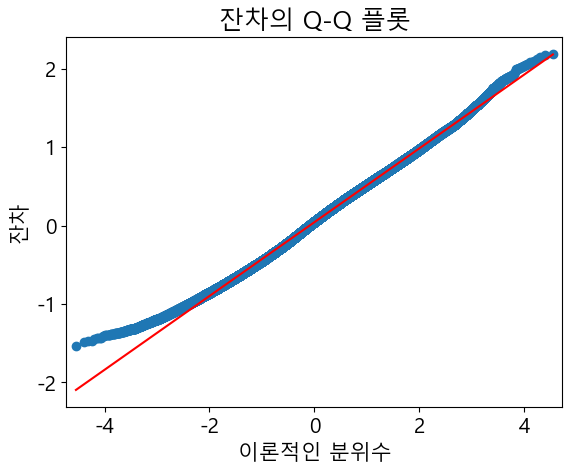

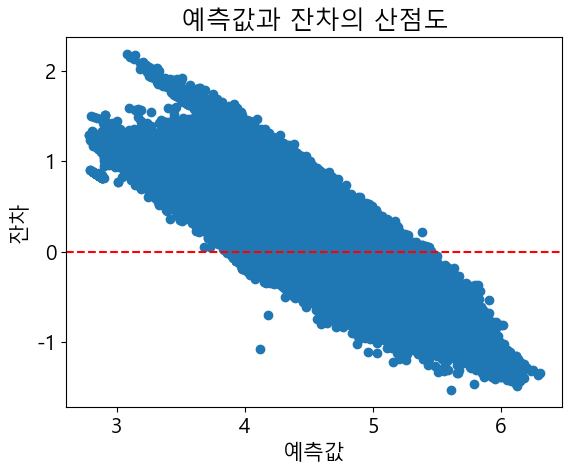

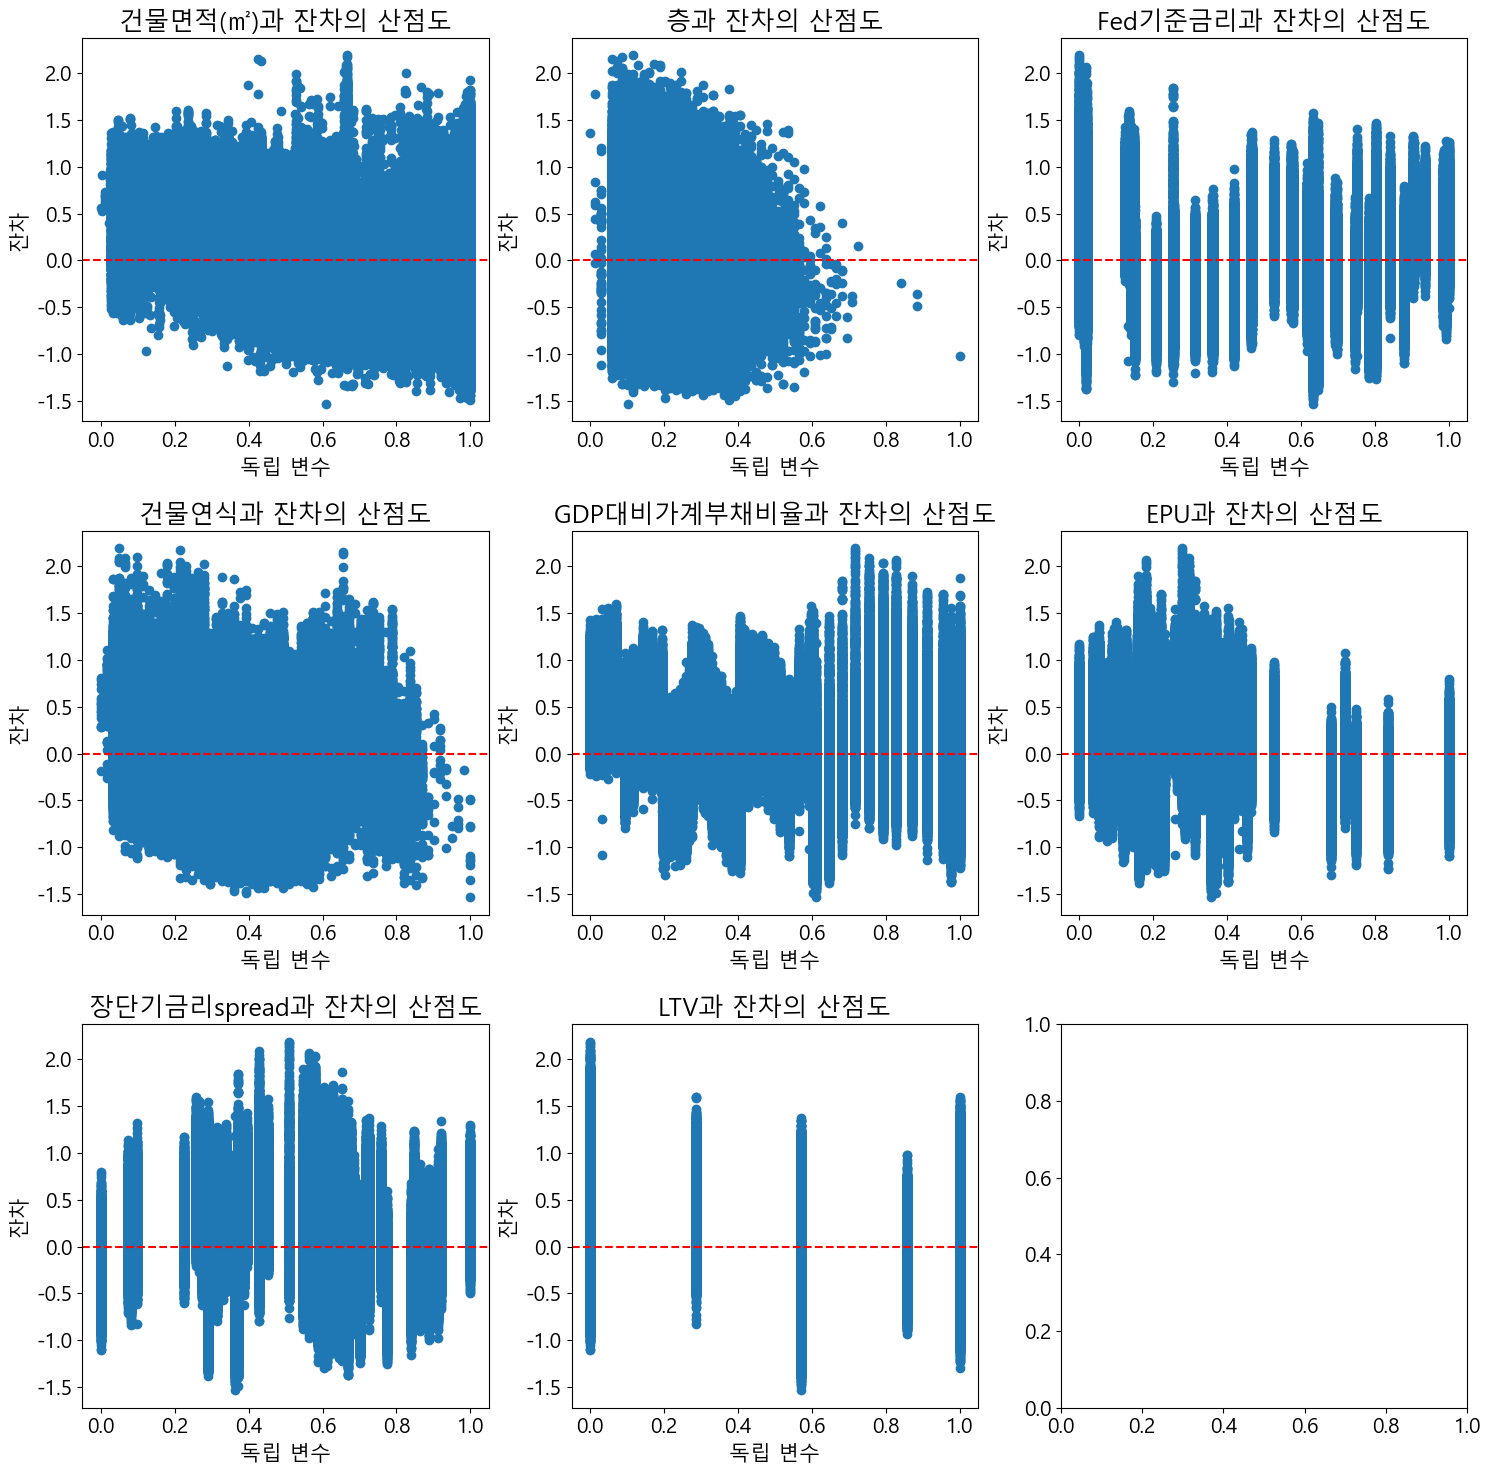

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()